In [2]:
#importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as pl
from pmdarima.arima import auto_arima
from matplotlib.pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
rcParams['figure.figsize'] = 15,6

In [3]:
#importação da base de dados
data = pd.read_csv('MRTSMPCSM4400CUSN.csv', index_col = 'date')
data.head()

,realtime_start,value,realtime_end
date,,,
1993-01-01,2019-12-06,-53.3,2019-12-06
1993-02-01,2019-12-06,-2.2,2019-12-06
1993-03-01,2019-12-06,14.8,2019-12-06
1993-04-01,2019-12-06,5.9,2019-12-06
1993-05-01,2019-12-06,3.9,2019-12-06


In [4]:
#drop de colunas que não serão utilizadas
data = data.drop(columns = ['realtime_start','realtime_end'])

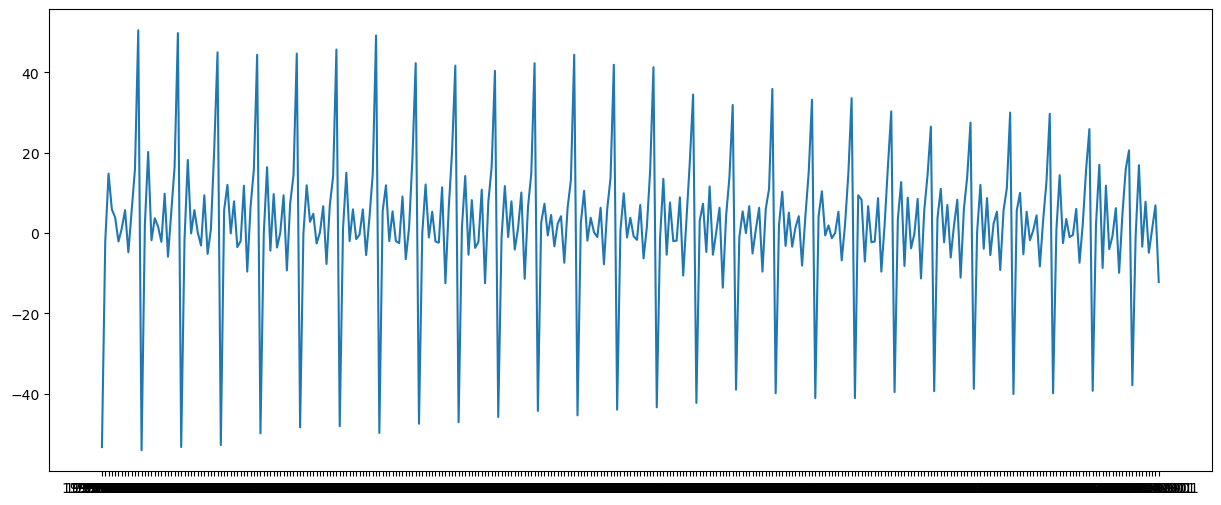

In [5]:
#visualização dos dados
pl.plot(data)

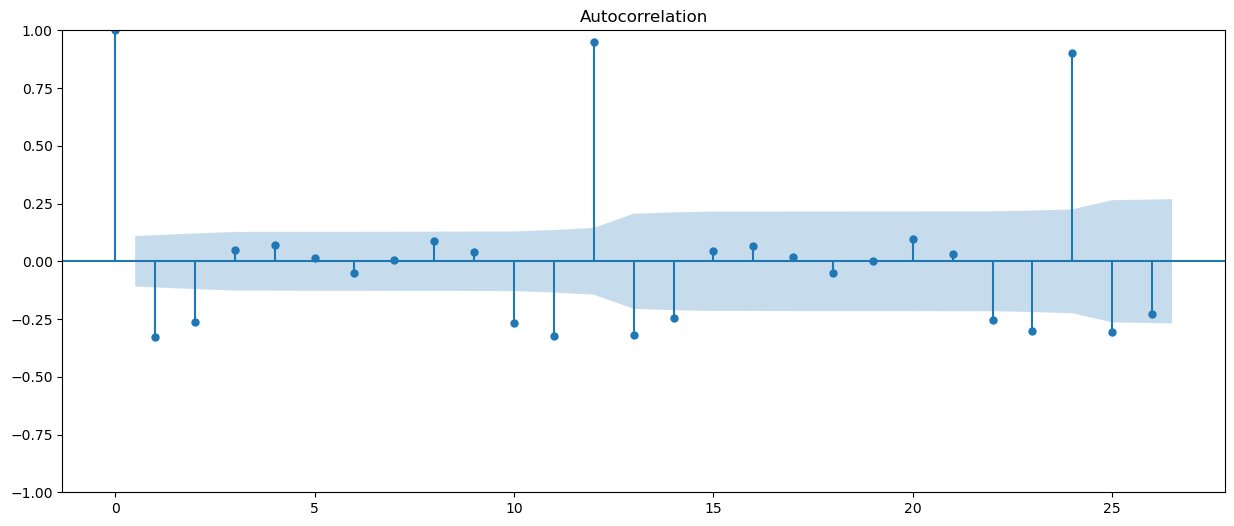

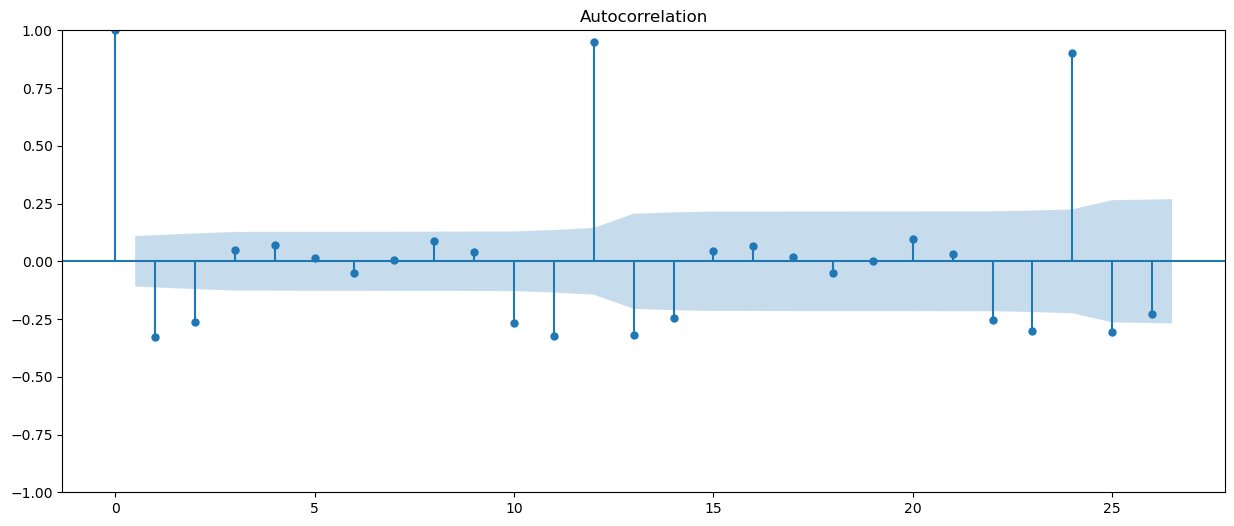

In [6]:
#verificação do periodo de sazonalidade
#com picos em 12 e 24 podemos inferir que o numero de periodos da sazonalidade é igual a 12(anual já que os dados foram coletados mensalmente)
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data)

In [7]:
#decomposição para visualização de tendencias,sazonalidade e ruído
decomp = seasonal_decompose(data, period = 12)

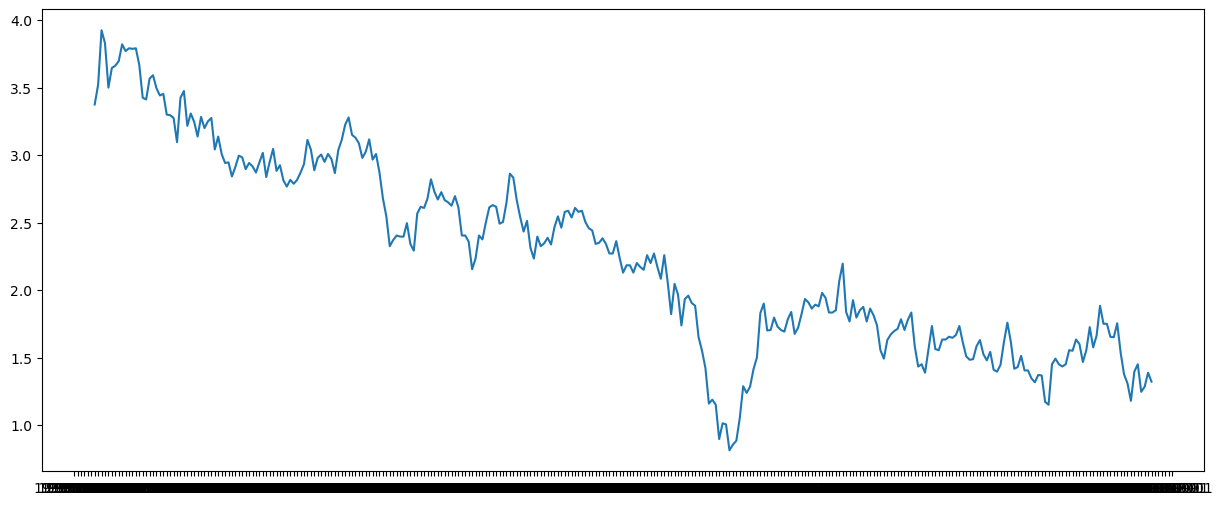

In [8]:
#tendencia
tendencia = decomp.trend
pl.plot(tendencia)

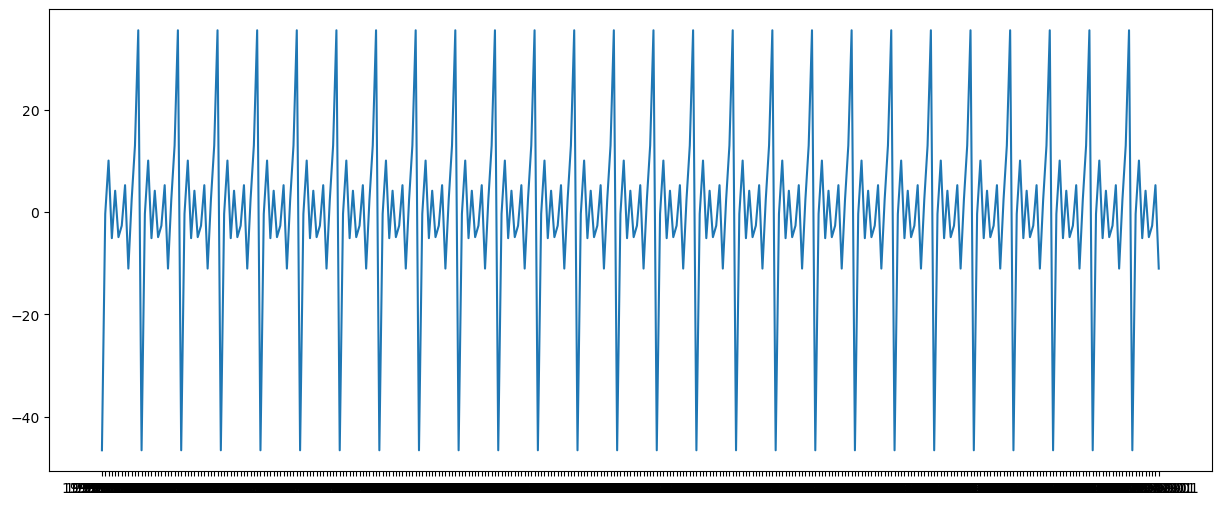

In [9]:
#sazonalidade
sazonalidade = decomp.seasonal
pl.plot(sazonalidade)

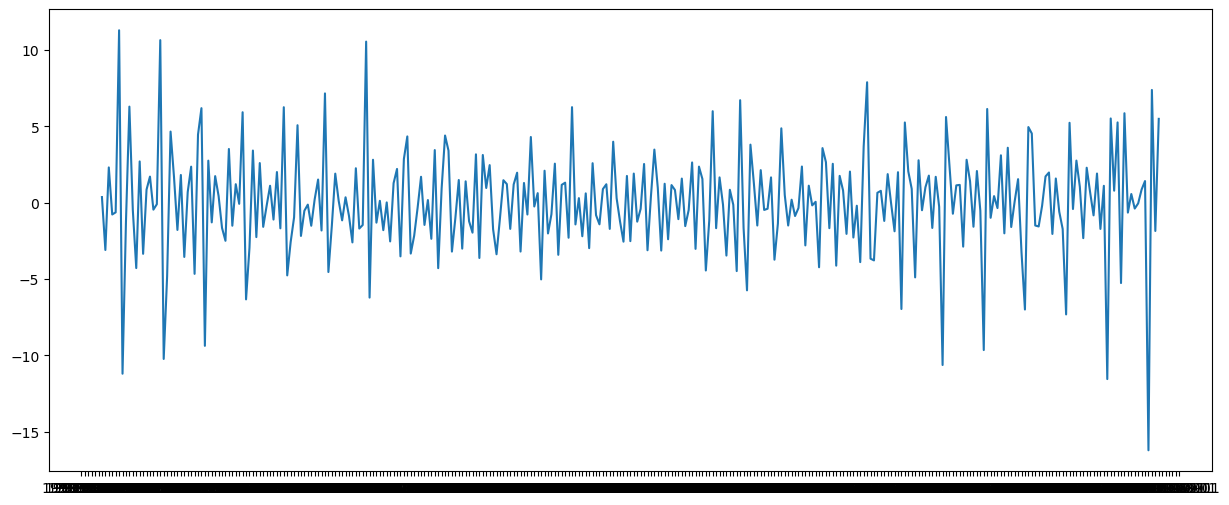

In [10]:
#erro
ruido = decomp.resid
pl.plot(ruido)

In [11]:
#definição dos melhores p,d e q(P,D,Q) para o modelo, utilizando da função auto_arima
stepwise_model = auto_arima(data, m = 12, seasonal = True, trace = True )

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1351.568, Time=1.06 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1520.969, Time=0.11 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1411.963, Time=0.47 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1371.264, Time=0.59 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1519.249, Time=0.09 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=1350.323, Time=1.15 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=1393.178, Time=1.08 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=1351.582, Time=4.83 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=1360.378, Time=1.22 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=1353.557, Time=3.22 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=1365.794, Time=0.92 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=1348.570, Time=0.96 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=1391.218, Time=0.37 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=1349.624, Time=0.84 sec
 ARIMA(2,0,1)(0,1,2

In [12]:
#separação dos dados em treino e teste
train = data.loc[:'2018-12-01']

In [13]:
test = data.loc['2019-01-01':]

In [14]:
#treino do modelo
stepwise_model.fit(train)

ARIMA(order=(2, 0, 1), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [15]:
#previsão dos valores test
future_forecast = stepwise_model.predict(n_periods = 9)

In [17]:
#para melhor visualização e comparação tranformo future forecast em um data frame
future_forecast = pd.DataFrame(future_forecast, index = test.index, columns = ['value'])

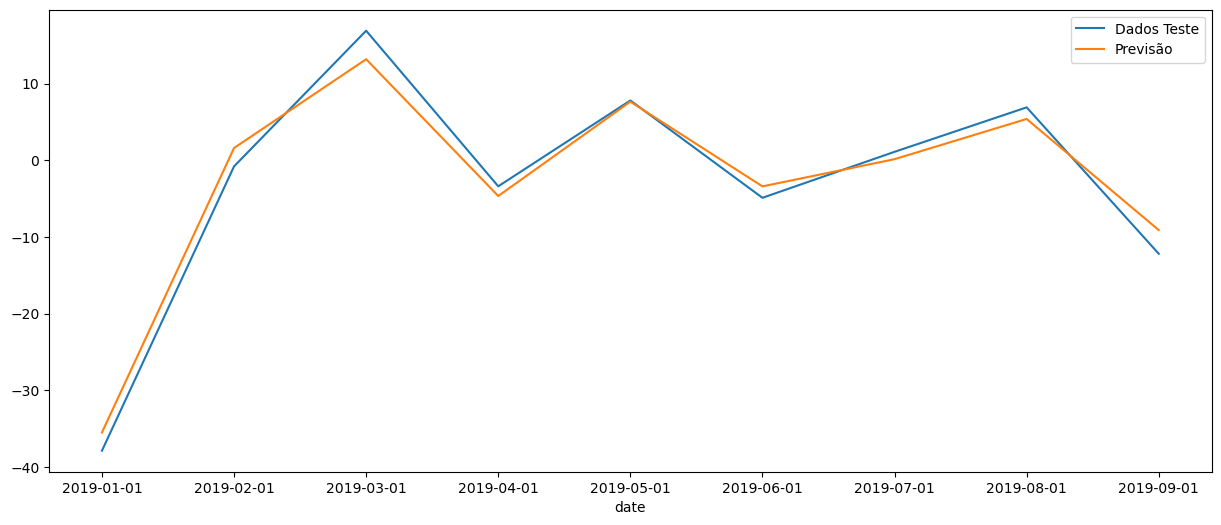

In [22]:
#visualização em conjunto das previsões com o teste
pd.concat([test,future_forecast], axis = 1).plot().legend(["Dados Teste", "Previsão"])

<Axes: xlabel='date'>

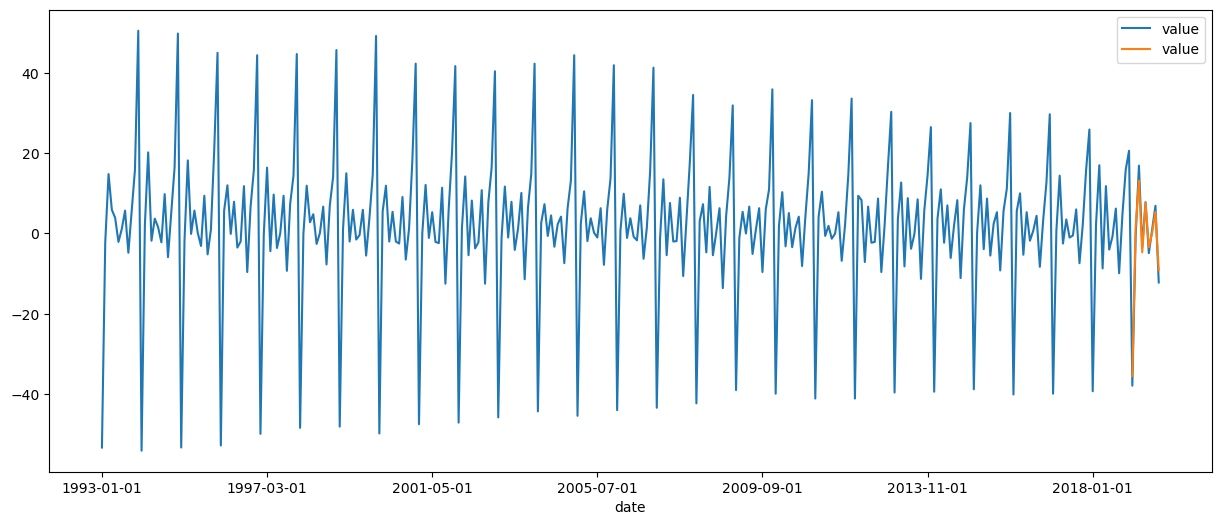

In [21]:
#vizualização do teste com o todo
pd.concat([data,future_forecast], axis = 1).plot()

In [62]:
#salvando
from joblib import dump

dump(stepwise_model,'stepwise_model')

['stepwise_model']